#  Gale-Shapley and Irving Algorithms - Lab 9


Adriano Ramón Hernández


## 1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.


### 1.1. Gale-Shapley Algorithm

Tomado de [Geek for Geeks](https://www.geeksforgeeks.org/stable-marriage-problem/)



In [1]:
# This implementation code is available in:
# https://www.geeksforgeeks.org/stable-marriage-problem/
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, woman, man, man1, n): 
  N = n
	# Check if w prefers m over her 
	# current engagment m1 
  for i in range(N):
		# If m1 comes before m in list of w, 
		# then w prefers her current engagement, 
		# don't do anything 
    if (prefer[woman][i] == man1): 
      return True
		# If m cmes before m1 in w's list, 
		# then free her current engagement 
		# and engage her with m 
    if (prefer[woman][i] == man): 
      return False
  
# Prints stable matching for N boys and N girls. 
# Boys are numbered as 0 to N-1. 
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer, n): 
  N = n
  # Stores partner of women. This is our output 
  # array that stores paing information. 
	# The value of wPartner[i] indicates the partner 
	# assigned to woman N+i. Note that the woman numbers 
	# between N and 2*N-1. The value -1 indicates 
	# that (N+i)'th woman is free 
  wPartner = [-1 for i in range(N)] 

	# An array to store availability of men. 
	# If mFree[i] is false, then man 'i' is free, 
	# otherwise engaged. 
  mFree = [False for i in range(N)] 

  freeCount = N 

  contador = 0

	# While there are free men 
  while (freeCount > 0): 
    contador += 1
		# Pick the first free man (we could pick any) 
    m = 0
    while (m < N): 
      if (mFree[m] == False): 
        break
      m += 1

		# One by one go to all women according to 
		# m's preferences. Here m is the picked free man 
    i = 0
    while i < N and mFree[m] == False: 
      w = prefer[m][i] 

			# The woman of preference is free, 
			# w and m become partners (Note that 
			# the partnership maybe changed later). 
			# So we can say they are engaged not married 
      if (wPartner[w - N] == -1): 
        wPartner[w - N] = m 
        mFree[m] = True
        freeCount -= 1

      else: 	
				# If w is not free 
				# Find current engagement of w 
        m1 = wPartner[w - N] 

				# If w prefers m over her current engagement m1, 
				# then break the engagement between w and m1 and 
				# engage m with w. 
        if (wPrefersM1OverM(prefer, w, m, m1, N) == False): 
          wPartner[w - N] = m 
          mFree[m] = True
          mFree[m1] = False
      i += 1

			# End of Else 
		# End of the for loop that goes 
		# to all women in m's list 
	# End of main while loop 

	# Print the solution 
  print("Iterations: ", contador)
  print("Woman ", " Man") 
  for i in range(N): 
    print(i + N, "<--->", wPartner[i]) 
  return contador

#### 1.1.1 worst cases with N=4 and N=40

In [2]:
# Create the worst case
# m1: w1 w2 w3 w4 
# m2: w2 w3 w1 w4 
# m3: w3 w1 w2 w4 
# m4: w1 w2 w3 w4 

# w1: m2 m3 m4 m1
# w2: m3 m4 m1 m2
# w3: m4 m1 m2 m3
# w4: m1 m2 m3 m4

def worstCaseGS(N):
  ''' create a matrix of preferences '''
  preferS = []
  # Fill woman list
  preferW = [i+N for i in range(N)]
  preferS.append(preferW[:])
  for i in range(N-1):
    listaux = preferW[1:N-1]
    elemaux = preferW[0]
    preferW[N-2] = elemaux
    preferW[0:N-2] = listaux[:]
    preferS.append(preferW[:])
  # Fill man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferS.append(preferM[:])
  return preferS

# Worst Case for N=4
N1 = 4
prefer1 = worstCaseGS(N1)

# Worst Case for N=40
N2=40
prefer2 = worstCaseGS(N2)


In [3]:
print("Gale-Shapley Algorithm")

print("\nStable Marriage - Worst Case with N:", N1)
print("Analtically of de worst case: O(n) = n(n-1)+1 =", N1*(N1-1)+1)
v = stableMarriage(prefer1, N1) 


print("\nStable Marriage - Worst Case with N:", N2)
print("Analtically of de worst case: O(n) = n(n-1)+1 =", N2*(N2-1)+1)
v = stableMarriage(prefer2, N2) 


Gale-Shapley Algorithm

Stable Marriage - Worst Case with N: 4
Analtically of de worst case: O(n) = n(n-1)+1 = 13
Iterations:  13
Woman   Man
4 <---> 1
5 <---> 2
6 <---> 3
7 <---> 0

Stable Marriage - Worst Case with N: 40
Analtically of de worst case: O(n) = n(n-1)+1 = 1561
Iterations:  1561
Woman   Man
40 <---> 1
41 <---> 2
42 <---> 3
43 <---> 4
44 <---> 5
45 <---> 6
46 <---> 7
47 <---> 8
48 <---> 9
49 <---> 10
50 <---> 11
51 <---> 12
52 <---> 13
53 <---> 14
54 <---> 15
55 <---> 16
56 <---> 17
57 <---> 18
58 <---> 19
59 <---> 20
60 <---> 21
61 <---> 22
62 <---> 23
63 <---> 24
64 <---> 25
65 <---> 26
66 <---> 27
67 <---> 28
68 <---> 29
69 <---> 30
70 <---> 31
71 <---> 32
72 <---> 33
73 <---> 34
74 <---> 35
75 <---> 36
76 <---> 37
77 <---> 38
78 <---> 39
79 <---> 0


#### 1.1.2 best cases with N=4 and N=40

In [4]:
#Best cases
def bestCasesGS(N):
  preferBS = []
  # Fill woman list
  preferW = [i+N for i in range(N)]
  for i in range(N):
    ax = preferW.pop(0)
    preferW.append(ax)
    preferBS.append(preferW[:])
  # Fill man list
  preferM = [i for i in range(N)]
  for i in range(N):
    ax = preferM.pop(0)
    preferM.append(ax)
    preferBS.append(preferM[:]) 
  return preferBS

NB1 = 4
preferB1 = bestCasesGS(NB1)

NB2 = 40
preferB2 = bestCasesGS(NB2)

In [5]:
print("Gale-Shapley Algorithm")

print("\nStable Marriage - Best Case with N:", NB1)
print("Analtically of de best case: O(n) = n =", NB1)
v=stableMarriage(preferB1, NB1) 


print("\nStable Marriage - Best Case with N:", NB2)
print("Analtically of de best case: O(n) = n =", NB2)
v=stableMarriage(preferB2, NB2) 

Gale-Shapley Algorithm

Stable Marriage - Best Case with N: 4
Analtically of de best case: O(n) = n = 4
Iterations:  4
Woman   Man
4 <---> 3
5 <---> 0
6 <---> 1
7 <---> 2

Stable Marriage - Best Case with N: 40
Analtically of de best case: O(n) = n = 40
Iterations:  40
Woman   Man
40 <---> 39
41 <---> 0
42 <---> 1
43 <---> 2
44 <---> 3
45 <---> 4
46 <---> 5
47 <---> 6
48 <---> 7
49 <---> 8
50 <---> 9
51 <---> 10
52 <---> 11
53 <---> 12
54 <---> 13
55 <---> 14
56 <---> 15
57 <---> 16
58 <---> 17
59 <---> 18
60 <---> 19
61 <---> 20
62 <---> 21
63 <---> 22
64 <---> 23
65 <---> 24
66 <---> 25
67 <---> 26
68 <---> 27
69 <---> 28
70 <---> 29
71 <---> 30
72 <---> 31
73 <---> 32
74 <---> 33
75 <---> 34
76 <---> 35
77 <---> 36
78 <---> 37
79 <---> 38


##2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

### 100 times with n=4

In [6]:
import random as r

lishist = []

N1=4
intentos = 100
print("Gale-Shapley {0} times with N = {1} \n\n".format(intentos,N1))
print("Analtically of de worst case: O(n) = n(n-1)+1 =", N1*(N1-1)+1)

for i in range(intentos):
  preferlist = []
  preferM = [i for i in range(N1)]
  auxM = preferM[:]
  preferW = [i+N1 for i in range(N1)]
  auxW = preferW[:]
  for k in range(N1):
    r.shuffle(auxW)
    preferlist.append(auxW[:])
  for j in range(N1):
    r.shuffle(auxM)
    preferlist.append(auxM[:])
  
  

  print(i+1,'). ',preferlist)
  print("Stable Marriage - Worst Case with N:", N1)
  c = stableMarriage(preferlist, N1) 
  lishist.append(c)
  print("\n")

Gale-Shapley 100 times with N = 4 


Analtically of de worst case: O(n) = n(n-1)+1 = 13
1 ).  [[7, 4, 6, 5], [6, 5, 4, 7], [4, 7, 5, 6], [5, 4, 7, 6], [2, 3, 0, 1], [0, 2, 1, 3], [2, 0, 1, 3], [1, 2, 3, 0]]
Stable Marriage - Worst Case with N: 4
Iterations:  4
Woman   Man
4 <---> 2
5 <---> 3
6 <---> 1
7 <---> 0


2 ).  [[7, 4, 6, 5], [7, 6, 5, 4], [5, 6, 7, 4], [6, 5, 7, 4], [3, 0, 1, 2], [1, 3, 2, 0], [1, 2, 3, 0], [2, 3, 1, 0]]
Stable Marriage - Worst Case with N: 4
Iterations:  5
Woman   Man
4 <---> 0
5 <---> 2
6 <---> 3
7 <---> 1


3 ).  [[4, 5, 7, 6], [5, 7, 4, 6], [5, 4, 6, 7], [6, 5, 7, 4], [2, 0, 1, 3], [3, 0, 1, 2], [2, 1, 0, 3], [0, 1, 3, 2]]
Stable Marriage - Worst Case with N: 4
Iterations:  6
Woman   Man
4 <---> 2
5 <---> 0
6 <---> 3
7 <---> 1


4 ).  [[4, 5, 7, 6], [4, 5, 7, 6], [6, 7, 4, 5], [7, 5, 4, 6], [0, 2, 3, 1], [1, 2, 0, 3], [0, 2, 1, 3], [0, 3, 1, 2]]
Stable Marriage - Worst Case with N: 4
Iterations:  4
Woman   Man
4 <---> 0
5 <---> 1
6 <---> 2
7 <---> 3


5 ).

Max number of iterations: 8
Min number of iterations: 4
Avg number of iterations: 5.16


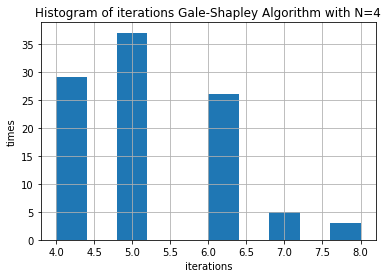

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

print("Max number of iterations: {}".format(max(lishist)))
print("Min number of iterations: {}".format(min(lishist)))
print("Avg number of iterations: {}".format(sum(lishist)/intentos))

title = "Histogram of iterations Gale-Shapley Algorithm with N=" + str(N1)

h = pd.DataFrame(lishist).hist()
plt.title(title)
plt.xlabel("iterations")
plt.ylabel("times")
plt.show()


### 100 times with n=40

In [8]:
lishist = []
N1=40
intentos = 100
print("Gale-Shapley {0} times with N = {1} \n\n".format(intentos,N1))
print("Analtically of de worst case: O(n) = n(n-1)+1 =", N1*(N1-1)+1)
for i in range(intentos):
  preferlist = []
  preferM = [i for i in range(N1)]
  auxM = preferM[:]
  preferW = [i+N1 for i in range(N1)]
  auxW = preferW[:]
  for k in range(N1):
    r.shuffle(auxW)
    # print(auxW)
    preferlist.append(auxW[:])
  for j in range(N1):
    r.shuffle(auxM)
    # print(auxM)
    preferlist.append(auxM[:])
  
  
  print(i+1,'). ',preferlist)
  print("Stable Marriage - Worst Case with N:", N1)
  c = stableMarriage(preferlist, N1) 
  lishist.append(c)
  print("\n")

Gale-Shapley 100 times with N = 40 


Analtically of de worst case: O(n) = n(n-1)+1 = 1561
1 ).  [[48, 63, 74, 41, 66, 62, 57, 79, 59, 69, 77, 45, 72, 67, 40, 58, 49, 64, 46, 61, 71, 78, 68, 53, 70, 47, 52, 76, 75, 55, 50, 42, 54, 60, 73, 65, 51, 56, 43, 44], [53, 54, 57, 43, 71, 78, 44, 70, 66, 79, 52, 59, 58, 45, 74, 69, 65, 63, 40, 51, 60, 55, 56, 68, 41, 46, 67, 61, 42, 49, 47, 48, 72, 75, 64, 77, 76, 62, 50, 73], [44, 40, 59, 63, 54, 64, 70, 73, 79, 71, 60, 47, 57, 65, 52, 68, 77, 58, 46, 45, 53, 49, 76, 43, 74, 78, 72, 48, 41, 75, 42, 61, 69, 51, 50, 55, 66, 56, 67, 62], [77, 48, 79, 60, 73, 63, 53, 57, 70, 47, 67, 44, 61, 56, 40, 50, 49, 66, 78, 54, 51, 46, 45, 42, 58, 68, 55, 65, 64, 75, 76, 59, 43, 74, 41, 69, 72, 62, 71, 52], [62, 46, 58, 41, 63, 50, 40, 53, 42, 54, 64, 73, 45, 68, 75, 44, 59, 78, 71, 79, 52, 69, 60, 72, 66, 67, 49, 51, 48, 47, 65, 43, 61, 57, 70, 55, 76, 74, 77, 56], [59, 46, 69, 73, 41, 75, 62, 77, 54, 57, 47, 64, 40, 65, 56, 52, 48, 50, 55, 44, 66, 58, 68,

Max number of iterations: 99
Min number of iterations: 54
Avg number of iterations: 76.57


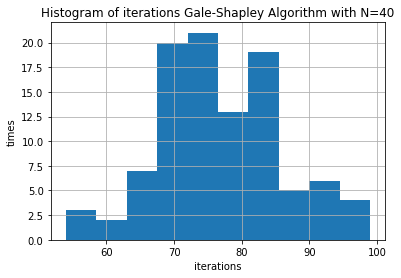

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

print("Max number of iterations: {}".format(max(lishist)))
print("Min number of iterations: {}".format(min(lishist)))
print("Avg number of iterations: {}".format(sum(lishist)/intentos))

title = "Histogram of iterations Gale-Shapley Algorithm with N=" + str(N1)

h = pd.DataFrame(lishist).hist()
plt.title(title)
plt.xlabel("iterations")
plt.ylabel("times")
plt.show()

##3. Sin terminar (Extra credit) Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation of the type show in “Illustrating the Deferred Acceptance Algorithm with R – Code!" 


In [18]:
from PIL import Image, ImageDraw

# Prints stable matching for N boys and N girls. 
# Boys are numbered as 0 to N-1. 
# Girls are numbereed as N to 2N-1. 
def gstableMarriage(prefer, n): 
  #images = []

  #im = Image.new('RGB', (width, width), color_1)
  #draw = ImageDraw.Draw(im)
  #draw.ellipse((center - i, center - i, center + i, center + i), fill=color_2)
  #images.append(im)

  N = n
  # Stores partner of women. This is our output 
  # array that stores paing information. 
	# The value of wPartner[i] indicates the partner 
	# assigned to woman N+i. Note that the woman numbers 
	# between N and 2*N-1. The value -1 indicates 
	# that (N+i)'th woman is free 
  wPartner = [-1 for i in range(N)] 

	# An array to store availability of men. 
	# If mFree[i] is false, then man 'i' is free, 
	# otherwise engaged. 
  mFree = [False for i in range(N)] 

  freeCount = N 

  contador = 0

	# While there are free men 
  while (freeCount > 0): 
    contador += 1
		# Pick the first free man (we could pick any) 
    m = 0
    while (m < N): 
      if (mFree[m] == False): 
        break
      m += 1

		# One by one go to all women according to 
		# m's preferences. Here m is the picked free man 
    i = 0
    while i < N and mFree[m] == False: 
      w = prefer[m][i] 

			# The woman of preference is free, 
			# w and m become partners (Note that 
			# the partnership maybe changed later). 
			# So we can say they are engaged not married 
      if (wPartner[w - N] == -1): 
        wPartner[w - N] = m 
        mFree[m] = True
        freeCount -= 1

      else: 	
				# If w is not free 
				# Find current engagement of w 
        m1 = wPartner[w - N] 

				# If w prefers m over her current engagement m1, 
				# then break the engagement between w and m1 and 
				# engage m with w. 
        if (wPrefersM1OverM(prefer, w, m, m1, N) == False): 
          wPartner[w - N] = m 
          mFree[m] = True
          mFree[m1] = False
      i += 1

			# End of Else 
		# End of the for loop that goes 
		# to all women in m's list 
	# End of main while loop 

	# Print the solution 
  print("Iterations: ", contador)
  print("Woman ", " Man") 
  for i in range(N): 
    print(i + N, "<--->", wPartner[i]) 
  
  #images[0].save('stablemarriage.gif',
               #save_all=True, append_images=images[1:], optimize=False, duration=40, loop=0)
  
  return contador

In [19]:
from PIL import Image, ImageDraw



In [20]:
from IPython.display import Image
